To explore supervised machine learning

In [4]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
print("Data imported successfully")
sdata.head(8)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [6]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
sdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Checking for nulls
for feature in sdata.columns:
    if sdata[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(sdata[feature].isnull().mean()*100,1)))
    else:
        print("No null values found")

No null values found
No null values found


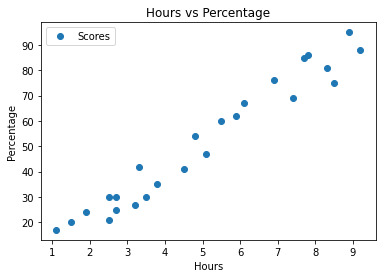

In [9]:
# Plotting the distribution of scores
sdata.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [23]:
# Data preparation
X=sdata.iloc[:,:1].values
y=sdata.iloc[:,1].values

In [24]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [12]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [13]:
# Training the model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train,y_train)

print("Training complete.")

Training complete.


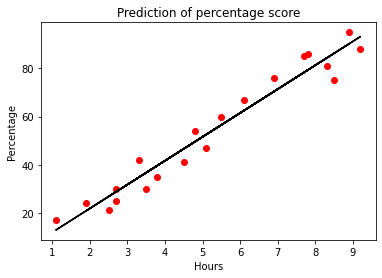

In [14]:
# Plotting training dataset
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,regr.predict(x_train), color="black")
plt.title("Prediction of percentage score")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

In [15]:
# Predicting the scores
y_pred=regr.predict(x_test) 

In [16]:
# Comparing actual and predicted score
score = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Predicting scores for 9.25 hrs
hrs = 9.25
print("Number of hours the student studied: ",hrs)
print("Predicted score for the student: ",regr.predict(np.array(hrs).reshape(1,-1))[0])

Number of hours the student studied:  9.25
Predicted score for the student:  93.69173248737539


In [20]:
# Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
